In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

In [2]:
df=pd.read_csv(r'C:\Users\DELL\Desktop\Capstone\ONLINE RETAIL\OnlineRetail.csv',encoding= 'unicode_escape')

In [3]:
df.shape

(541909, 8)

In [4]:
df.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [6]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [7]:
df.dropna(inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


In [9]:
#Change datatype of CustomerID to string
df['CustomerID']=df['CustomerID'].astype('str')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  object 
 7   Country      406829 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 27.9+ MB


In [130]:
#Based on the data available we are going to analysize the customers on Recency(no of days since last purchase),
#   Frequecy(no of transactions), Amount(Total amount in all transactions)

In [22]:
#Data preparation to analysize as per above
df['amount']=df['UnitPrice']*df['Quantity']
data_amt=df.groupby('CustomerID')['amount'].sum()
data_amt=data_amt.reset_index()
data_amt.rename(columns={'amount':'tot_amt'},inplace=True)
data_amt.head()

,CustomerID,tot_amt
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [23]:
data_freq=df.groupby('CustomerID')['InvoiceNo'].count()
data_freq=data_freq.reset_index()
data_freq.rename(columns={'InvoiceNo':'no_of_trans'},inplace=True)
data_freq.head()

,CustomerID,no_of_trans
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [24]:
df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'])

In [25]:
data_rec=df.groupby('CustomerID')['InvoiceDate'].max()
data_rec=data_rec.reset_index()
data_rec.head()

,CustomerID,InvoiceDate
0,12346.0,2011-01-18 10:17:00
1,12347.0,2011-12-07 15:52:00
2,12348.0,2011-09-25 13:13:00
3,12349.0,2011-11-21 09:51:00
4,12350.0,2011-02-02 16:01:00


In [26]:
from datetime import date
data_rec['InvoiceDate']=(data_rec['InvoiceDate'].max()-data_rec['InvoiceDate']).dt.days
data_rec.rename(columns={'InvoiceDate':'days_since_last_trans'},inplace=True)
data_rec.head()

,CustomerID,days_since_last_trans
0,12346.0,325
1,12347.0,1
2,12348.0,74
3,12349.0,18
4,12350.0,309


In [27]:
#Merging the three factors to analysize in a single dataframe
data=pd.merge(data_amt,data_freq,on='CustomerID',how='inner')
data.head()

,CustomerID,tot_amt,no_of_trans
0,12346.0,0.00,2
1,12347.0,4310.00,182
2,12348.0,1797.24,31
3,12349.0,1757.55,73
4,12350.0,334.40,17


In [28]:
data=pd.merge(data,data_rec,on='CustomerID',how='inner')
data.head()

,CustomerID,tot_amt,no_of_trans,days_since_last_trans
0,12346.0,0.00,2,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309


<AxesSubplot:xlabel='Factors', ylabel='Range'>

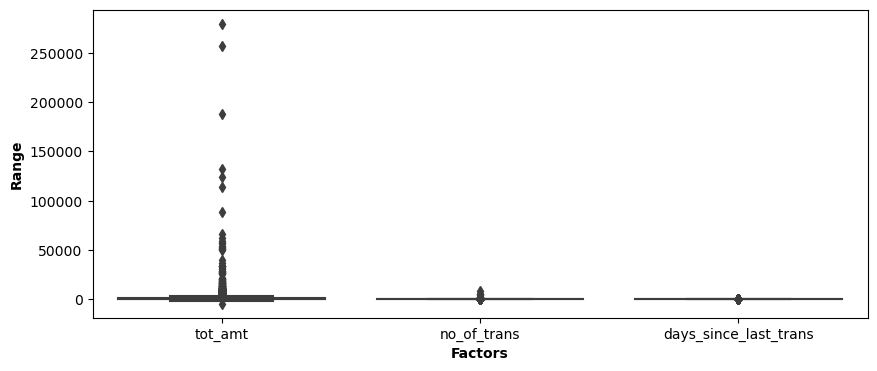

In [29]:
#Outlier analysis
plt.figure(figsize=(10,4))
att=['tot_amt','no_of_trans','days_since_last_trans']
plt.xlabel('Factors',fontweight='bold')
plt.ylabel('Range',fontweight='bold')
sns.boxplot(data=data[att])

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4372 entries, 0 to 4371
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CustomerID             4372 non-null   object 
 1   tot_amt                4372 non-null   float64
 2   no_of_trans            4372 non-null   int64  
 3   days_since_last_trans  4372 non-null   int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 170.8+ KB


In [31]:
#Outlier removal from amount and frequency only
q1amt=data['tot_amt'].quantile(0.05)
q3amt=data['tot_amt'].quantile(0.95)
iqramt=q3amt-q1amt
data=data[(data['tot_amt']>=q1amt-1.5*iqramt)&(data['tot_amt']<=q3amt+1.5*iqramt)]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4313 entries, 0 to 4371
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CustomerID             4313 non-null   object 
 1   tot_amt                4313 non-null   float64
 2   no_of_trans            4313 non-null   int64  
 3   days_since_last_trans  4313 non-null   int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 168.5+ KB


In [32]:
q1freq=data['no_of_trans'].quantile(0.05)
q3freq=data['no_of_trans'].quantile(0.95)
iqrfreq=q3freq-q1freq
data=data[(data['no_of_trans']>=q1freq-1.5*iqrfreq)&(data['no_of_trans']<=q3freq+1.5*iqrfreq)]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4293 entries, 0 to 4371
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CustomerID             4293 non-null   object 
 1   tot_amt                4293 non-null   float64
 2   no_of_trans            4293 non-null   int64  
 3   days_since_last_trans  4293 non-null   int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 167.7+ KB


In [33]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [37]:
scaled_data=sc.fit_transform(np.array(data['tot_amt']).reshape(-1,1))

In [39]:
scaled_data=pd.DataFrame(scaled_data)

In [40]:
scaled_data['no_of_trans']=sc.fit_transform(np.array(data['no_of_trans']).reshape(-1,1))

In [41]:
scaled_data['days_since_last_trans']=sc.fit_transform(np.array(data['days_since_last_trans']).reshape(-1,1))

In [42]:
scaled_data.head()

,0,no_of_trans,days_since_last_trans
0,-0.723738,-0.752888,2.301611
1,1.731617,1.042467,-0.906466
2,0.300128,-0.463636,-0.183658
3,0.277517,-0.044720,-0.738141
4,-0.533235,-0.603275,2.143188


In [43]:
scaled_data.rename(columns={0:'tot_amt'},inplace=True)
scaled_data.head()

,tot_amt,no_of_trans,days_since_last_trans
0,-0.723738,-0.752888,2.301611
1,1.731617,1.042467,-0.906466
2,0.300128,-0.463636,-0.183658
3,0.277517,-0.044720,-0.738141
4,-0.533235,-0.603275,2.143188


In [44]:
scaled_data.shape

(4293, 3)

Text(0, 0.5, 'WCSS')

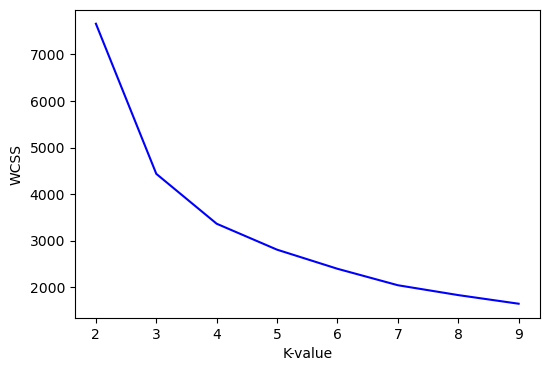

In [48]:
#Selecting ideal K-value using Elbow method
from sklearn.cluster import KMeans
wcss=[]

for i in range(2,10):
  kmeans=KMeans(n_clusters=i,max_iter=300)
  kmeans.fit(scaled_data)
  wcss.append(kmeans.inertia_)

plt.figure(figsize=(6,4))
plt.plot(range(2,10),wcss,color='blue')
plt.xticks(range(2,10))
plt.xlabel('K-value')
plt.ylabel('WCSS')

In [ ]:
#From the Elbow method it is clear that optimum value for clusters is 3, also we intend to group the customers on amount, frequency and recency

In [49]:
km3 = KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, random_state=None, tol=0.0001, verbose=2)
km3.fit(scaled_data)

Initialization complete
Iteration 0, inertia 5221.834255381273
Iteration 1, inertia 4461.350201182718
Iteration 2, inertia 4437.837330122571
Iteration 3, inertia 4435.091747641147
Iteration 4, inertia 4434.495027349316
Iteration 5, inertia 4434.134880691717
Iteration 6, inertia 4433.797164770988
Converged at iteration 6: center shift 4.719661588674059e-05 within tolerance 9.999999999999983e-05.
Initialization complete
Iteration 0, inertia 7340.15050419667
Iteration 1, inertia 6249.540353929937
Iteration 2, inertia 5898.386075763827
Iteration 3, inertia 5634.193185129349
Iteration 4, inertia 5101.844367293927
Iteration 5, inertia 4618.724810836771
Iteration 6, inertia 4472.233122549951
Iteration 7, inertia 4441.116804915799
Iteration 8, inertia 4436.096661668751
Iteration 9, inertia 4434.8637441076735
Iteration 10, inertia 4434.308932388541
Iteration 11, inertia 4433.935730822936
Iteration 12, inertia 4433.7726405861895
Converged at iteration 12: center shift 5.04938499240716e-05 within

KMeans(n_clusters=3, verbose=2)

In [50]:
y=km3.fit_predict(scaled_data)

Initialization complete
Iteration 0, inertia 7518.634037181122
Iteration 1, inertia 5234.311264439704
Iteration 2, inertia 4688.135688157093
Iteration 3, inertia 4521.217786280696
Iteration 4, inertia 4464.910810100586
Iteration 5, inertia 4440.873545056489
Iteration 6, inertia 4436.367166866445
Iteration 7, inertia 4434.964160925823
Iteration 8, inertia 4434.492109031927
Iteration 9, inertia 4434.134880691717
Iteration 10, inertia 4433.797164770988
Converged at iteration 10: center shift 4.71966158867406e-05 within tolerance 9.999999999999983e-05.
Initialization complete
Iteration 0, inertia 8194.023362228647
Iteration 1, inertia 4737.140723696231
Iteration 2, inertia 4521.022894737653
Iteration 3, inertia 4470.513675981642
Iteration 4, inertia 4452.452209946313
Iteration 5, inertia 4442.458117818536
Iteration 6, inertia 4435.410751127954
Iteration 7, inertia 4433.709421115371
Iteration 8, inertia 4433.586805811539
Converged at iteration 8: center shift 1.083632397415639e-05 within to

In [ ]:
y

array([2, 1, 0, ..., 2, 0, 0], dtype=int32)

In [51]:
scaled_data['label']=y
scaled_data['CustomerID']=data['CustomerID']
scaled_data.head()

,tot_amt,no_of_trans,days_since_last_trans,label,CustomerID
0,-0.723738,-0.752888,2.301611,1,12346.0
1,1.731617,1.042467,-0.906466,0,12347.0
2,0.300128,-0.463636,-0.183658,2,12348.0
3,0.277517,-0.044720,-0.738141,2,12349.0
4,-0.533235,-0.603275,2.143188,1,12350.0


In [ ]:
#Box plot of Label vs factors

<AxesSubplot:title={'center':'tot_amt'}, xlabel='label'>

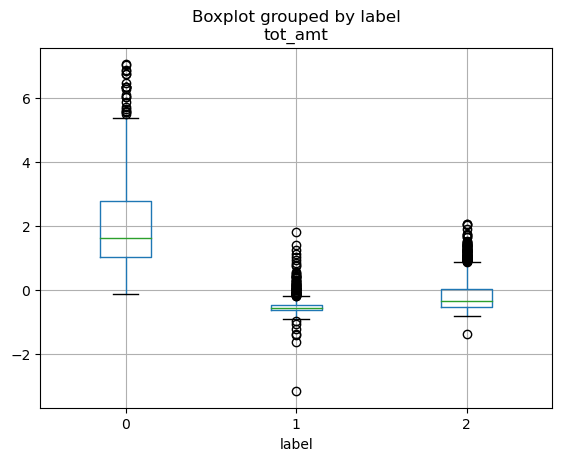

In [52]:
scaled_data.boxplot('tot_amt',by='label')

In [ ]:
#Customers with label 0 are high transaction doers

<AxesSubplot:title={'center':'days_since_last_trans'}, xlabel='label'>

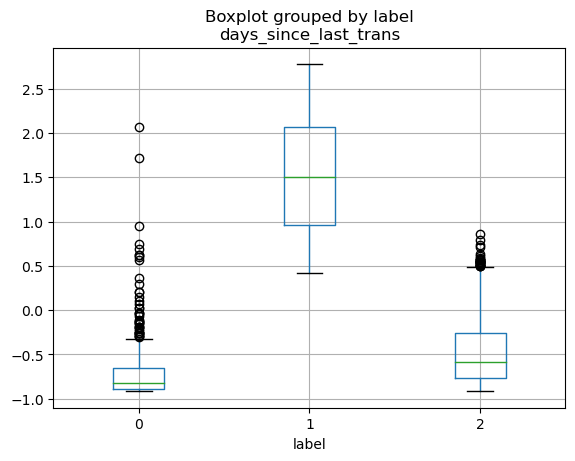

In [53]:
scaled_data.boxplot('days_since_last_trans',by='label')

In [ ]:
#Customers with label 1 are recent buyers

<AxesSubplot:title={'center':'no_of_trans'}, xlabel='label'>

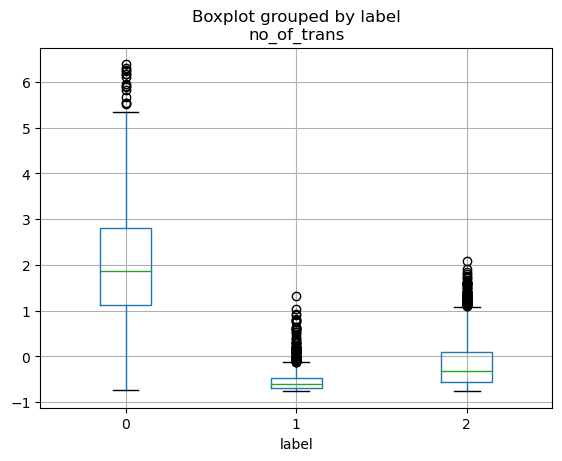

In [54]:
scaled_data.boxplot('no_of_trans',by='label')

In [ ]:
#Customers with label 0 are also frequent buyers

In [55]:
df1=pd.read_csv(r'C:\Users\DELL\Desktop\Capstone\ONLINE RETAIL\OnlineRetail.csv',encoding= 'unicode_escape')

In [56]:
df1.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [57]:
df1.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [58]:
#Drop the null values from the dataframe
df1.dropna(inplace=True)

In [59]:
df1.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [60]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


In [61]:
#removing impurities from InvoiceNo
df1.InvoiceNo=df1.InvoiceNo.str.replace('C','')

In [62]:
#changing the datatype of InvoiceNo to int
df1.InvoiceNo=df1.InvoiceNo.astype('int')

In [63]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  int32  
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int32(1), int64(1), object(4)
memory usage: 26.4+ MB


In [64]:
df1.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [68]:
#sorting the dataframe by InvoiceNo
df1=df1.sort_values(by='InvoiceNo').reset_index(drop=True)

In [69]:
df1.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [70]:
#Preparing list of lists for items in each InvoiceNo
records=[]
items=[]
invoice=df1.loc[0,'InvoiceNo']
for index,row in df1.iterrows():
    if(row['InvoiceNo']==invoice):
        items.append(row['Description'])
    else:
        records.append(items)
        invoice=row['InvoiceNo']
        items=[]
        items.append(row['Description'])
records.append(items)

In [71]:
from apyori import apriori

In [132]:
#applying apriori algorithm to find association rules
associationrules=apriori(records,min_support=0.02,min_confidence=0.4,min_lift=7,min_length=2)

In [133]:
#converting the accociation rules to list for better readability
association_results=list(associationrules)

In [134]:
#Checking the number of association rules
len(association_results)

15

In [135]:
#Print the list of products frequently bought together
for i in range(len(association_results)):
    print(association_results[i][0])

frozenset({'ALARM CLOCK BAKELIKE GREEN', 'ALARM CLOCK BAKELIKE RED '})
frozenset({'GARDENERS KNEELING PAD KEEP CALM ', 'GARDENERS KNEELING PAD CUP OF TEA '})
frozenset({'PINK REGENCY TEACUP AND SAUCER', 'GREEN REGENCY TEACUP AND SAUCER'})
frozenset({'GREEN REGENCY TEACUP AND SAUCER', 'ROSES REGENCY TEACUP AND SAUCER '})
frozenset({'JUMBO BAG PINK POLKADOT', 'JUMBO BAG RED RETROSPOT'})
frozenset({'LUNCH BAG  BLACK SKULL.', 'LUNCH BAG PINK POLKADOT'})
frozenset({'LUNCH BAG  BLACK SKULL.', 'LUNCH BAG RED RETROSPOT'})
frozenset({'LUNCH BAG RED RETROSPOT', 'LUNCH BAG CARS BLUE'})
frozenset({'LUNCH BAG RED RETROSPOT', 'LUNCH BAG PINK POLKADOT'})
frozenset({'LUNCH BAG RED RETROSPOT', 'LUNCH BAG SPACEBOY DESIGN '})
frozenset({'LUNCH BAG RED RETROSPOT', 'LUNCH BAG SUKI DESIGN '})
frozenset({"PAPER CHAIN KIT 50'S CHRISTMAS ", 'PAPER CHAIN KIT VINTAGE CHRISTMAS'})
frozenset({'PINK REGENCY TEACUP AND SAUCER', 'ROSES REGENCY TEACUP AND SAUCER '})
frozenset({'WHITE HANGING HEART T-LIGHT HOLDER', 'RE